<a href="https://colab.research.google.com/github/srichardson0/MarketAnalysisProject/blob/main/dsga1001_capstoneProjectCode_SRich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DS-GA 1001 Capstone Project Code


---
### Fall 2021
### Sasha Richardson
### NetID: sfr9746

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import pearsonr
from scipy.stats import ttest_ind 


In [ ]:
data = pd.read_csv("./marketing_data.csv")

### Clean Data

In [ ]:
# Identify NaN values in data
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
# Convert 'Income' column from string to float
data[' Income '] = data[' Income '].str[1:]       # remove dollar sign
data[' Income '] = data[' Income '].replace(',','', regex=True)
data[' Income '] = pd.to_numeric(data[' Income '],errors='coerce')

In [ ]:
#Finding the mean of the column having NaN
mean_value = data[' Income '].mean()
# Replace NaNs in column 'Income' with the
# mean of values in the same column
data[' Income '].fillna(value=mean_value, inplace=True)

In [ ]:
# Convert 'Dt_Customer' from str to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


### Are there any useful variables that can be engineered with the given data?

In [ ]:
# Creating new features for statistical analysis

data['yr_join'] = data['Dt_Customer'].dt.year
data['mth_join'] = data['Dt_Customer'].dt.month
data['num_minors'] = data['Kidhome'] + data['Teenhome']
data['amnt_spent_total'] = data['MntWines'] + data['MntSweetProducts'] + data['MntMeatProducts'] + data['MntGoldProds'] + data['MntFruits'] + data['MntFishProducts']
data['total_num_purchases'] = data['NumWebPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases'] + data['NumCatalogPurchases']
data['accept_campaign_total'] = data['AcceptedCmp5'] + data['AcceptedCmp4'] + data['AcceptedCmp3'] + data['AcceptedCmp2'] + data['AcceptedCmp1']
data['average_order_volume'] = data['amnt_spent_total'] / data['total_num_purchases']

### Are there any patterns or anomalies in the data which can be visualized?

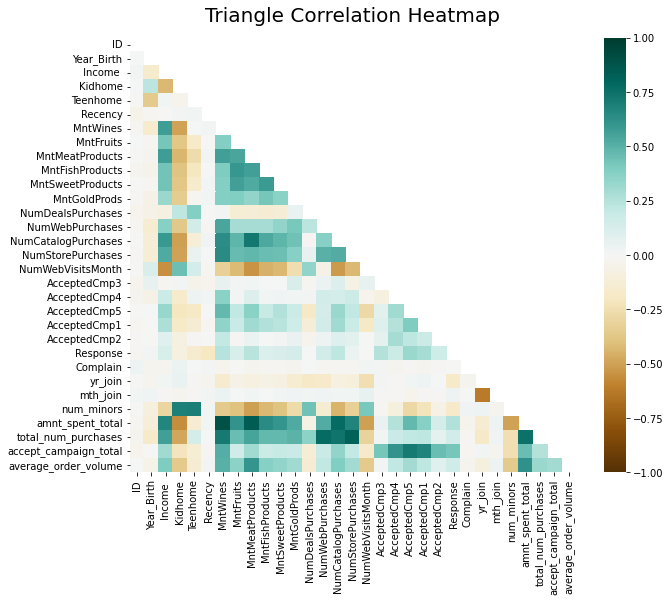

In [ ]:
np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sn.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

In [ ]:
def correlation(data,num_corr):
  corr = data.corr()
  np.fill_diagonal(corr.values, np.nan)

  order_top = np.argsort(-corr.values, axis=1)[:, :num_corr]

  col_lst = []
  for i in range(num_corr):
    col_lst.append(str(i+1))

  result_top = pd.DataFrame(
      corr.columns[order_top], 
      columns=col_lst,
      index=corr.index
  )

  result = result_top

  for x in result.columns:
      result[x+"_Val"] = corr.lookup(corr.index, result[x])

  return result


correlation(data,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


,1,2,3,4,5,1_Val,2_Val,3_Val,4_Val,5_Val
ID,Complain,mth_join,Income,MntFruits,average_order_volume,0.033883,0.018072,0.013036,0.004600,0.002901
Year_Birth,Kidhome,NumWebVisitsMonth,AcceptedCmp3,mth_join,Response,0.230176,0.121139,0.061774,0.024246,0.021325
Income,amnt_spent_total,NumCatalogPurchases,MntMeatProducts,MntWines,total_num_purchases,0.664706,0.586725,0.577802,0.576789,0.563370
Kidhome,num_minors,NumWebVisitsMonth,Year_Birth,NumDealsPurchases,yr_join,0.689971,0.447846,0.230176,0.221798,0.053339
Teenhome,num_minors,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,total_num_purchases,0.698433,0.387741,0.155500,0.134884,0.133163
Recency,NumCatalogPurchases,MntMeatProducts,MntSweetProducts,amnt_spent_total,AcceptedCmp4,0.025110,0.023056,0.022670,0.020433,0.018826
MntWines,amnt_spent_total,total_num_purchases,NumStorePurchases,NumCatalogPurchases,Income,0.891839,0.712789,0.642100,0.635226,0.576789
MntFruits,amnt_spent_total,MntFishProducts,MntSweetProducts,MntMeatProducts,NumCatalogPurchases,0.614229,0.594804,0.567164,0.543105,0.487917
MntMeatProducts,amnt_spent_total,NumCatalogPurchases,average_order_volume,Income,MntFishProducts,0.842965,0.723827,0.607036,0.577802,0.568402
MntFishProducts,amnt_spent_total,MntFruits,MntSweetProducts,MntMeatProducts,NumCatalogPurchases,0.642818,0.594804,0.579870,0.568402,0.534478


### What Factors are Significantly Related to the Number of Store Purchases?

In [ ]:
# drop ID as everyone has unique ID
data_new = data.drop(columns=['ID', 'Dt_Customer'])
data_new.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
data_new = pd.get_dummies(data_new)

X = data_new.drop(columns=['NumStorePurchases']) 
y = data_new['NumStorePurchases']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6876190476190476
Mean Squared Error: 1.2890729910714285
Root Mean Squared Error: 1.1353735028929592


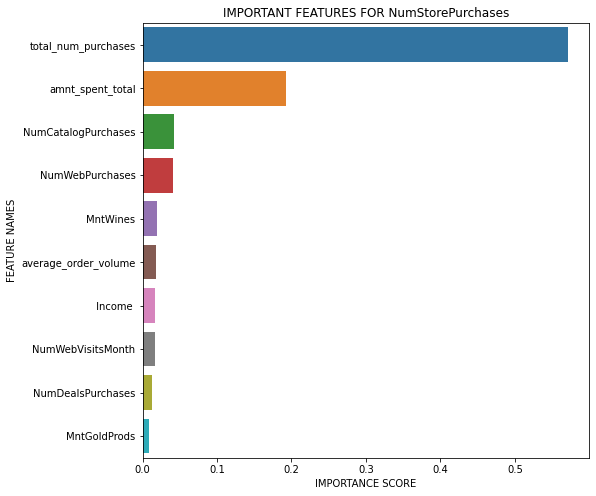

In [ ]:
#Create arrays from feature importance and feature names
feature_importance = np.array(rg.feature_importances_)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
dict_ ={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(dict_)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(8,8))
#Plot Searborn bar chart
sn.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'].iloc[0:10])
#Add chart labels
plt.title('IMPORTANT FEATURES FOR NumStorePurchases')
plt.xlabel('IMPORTANCE SCORE')
plt.ylabel('FEATURE NAMES')

plt.show()

### Comparing the Outcome of the Marketing Campaigns and Investigating the Difference in Performance of the Most Successful Campaign and the Rest with Respect to Location.

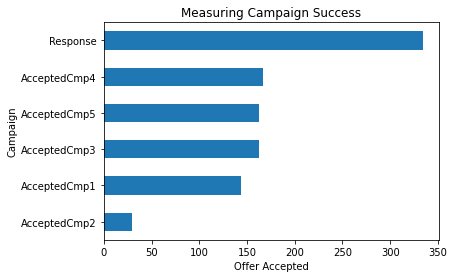

In [ ]:
data[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Measuring Campaign Success")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.show()

In [ ]:
# create 2 groups that accepted the offers from the last campaign and the campaign 1-5
cp_last = data[data.Response > 0]
cp_others = data[data.AcceptedCmp2 == 0]

In [ ]:
cp_last_country = pd.DataFrame((cp_last.Country.value_counts()/cp_last.shape[0])*100)
cp_last_country.rename(columns={'Country':'Percent'}, inplace=True)
cp_last_country['country'] = cp_last_country.index
cp_last_country = cp_last_country.sort_values('country')
cp_last_country.drop(['country'], axis=1, inplace=True)

cp_others_country = pd.DataFrame((cp_others.Country.value_counts()/cp_others.shape[0])*100)
cp_others_country.rename(columns={'Country':'Percent'}, inplace=True)
cp_others_country['country'] = cp_others_country.index
cp_others_country = cp_others_country.sort_values('country')
cp_others_country.drop(['country'], axis=1, inplace=True)


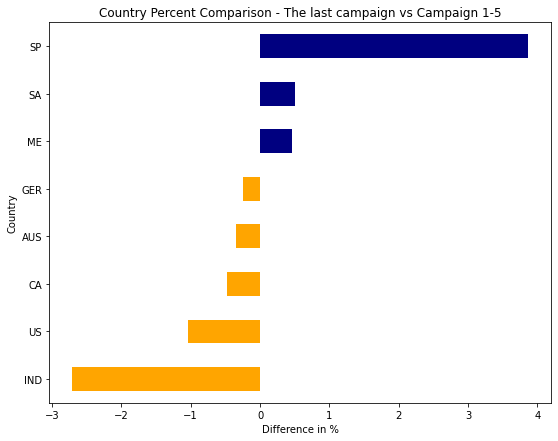

In [ ]:
country_final = cp_last_country-cp_others_country

# visualize the differences
plt.figure(figsize = (9, 7))
country_final.sort_values(by="Percent",inplace = True)
country_final['positive'] = country_final["Percent"] >=0
country_final["Percent"].plot(kind='barh', color=country_final.positive.map({True: 'navy', False: 'orange'}))
plt.title("Country Percent Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Country")
plt.savefig('Country Percent Comparison - The last campaign vs Campaign 1-5')

### The ’Age Effect’ : How Significantly Related is a Customers Year of Birth to the Amount of Money they Spend on Different Food Items?

T-test p-value:  1.6989334123026312e-14 True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


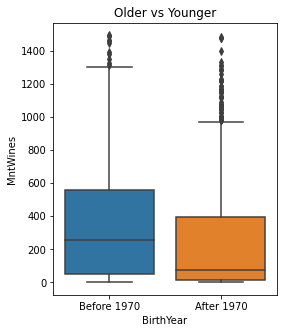

T-test p-value:  0.06099448815990552 False


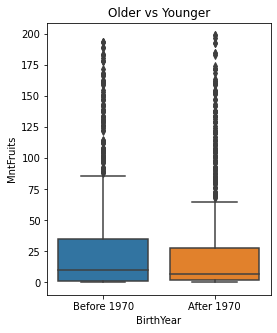

T-test p-value:  0.041250743316763414 True


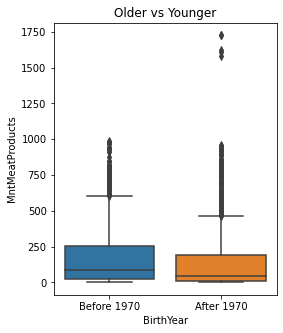

T-test p-value:  0.02620372739081801 True


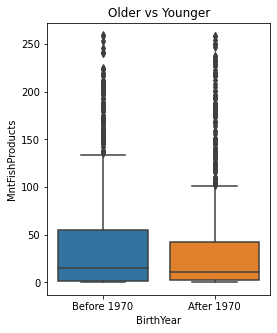

T-test p-value:  0.24833700093010183 False


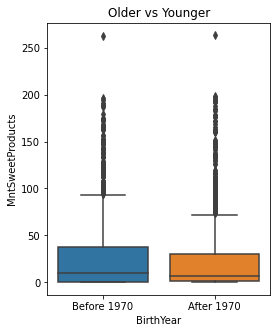

T-test p-value:  0.00018201287916041505 True


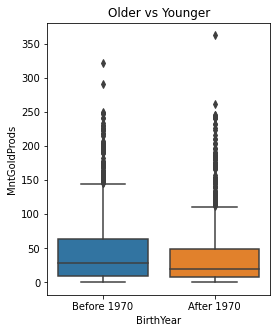

In [ ]:

data_c = data.copy()

older = data_c.loc[(data_c.Year_Birth <= 1970)]
older['BirthYear'] = "Before 1970"
younger = data_c.loc[(data_c.Year_Birth > 1970)]
younger['BirthYear'] = "After 1970"

products = ['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']

df = older.append(younger)

for i in products:
  pval = ttest_ind(older[i], younger[i]).pvalue
  print("T-test p-value: ", pval, pval < 0.05)
  plt.figure(figsize = (4, 5))
  plt.title("Older vs Younger")
  sn.boxplot(data = df, x = 'BirthYear', y = i)
  plt.ylabel(i)
  plt.show()

